In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.rename(columns={'Rebound Signal Strength nHz': 'Signal', 'Rock Density kg/m3': 'Density'}, inplace=True)

In [7]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


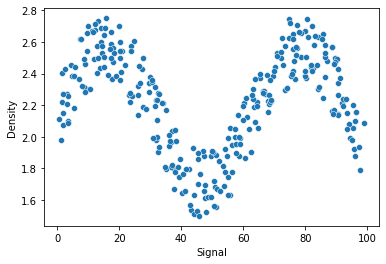

In [9]:
sns.scatterplot(x = 'Signal', y='Density', data = df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['Signal'].values.reshape(-1, 1), df['Density'], test_size=0.1, random_state = 101)

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
lr_pred = lr_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
MAE = mean_absolute_error

In [22]:
MAE(y_test, lr_pred)

0.211198973318633

In [23]:
MSE = mean_squared_error

In [25]:
MSE(y_test, lr_pred)**0.5

0.2570051996584629

In [30]:
signal_range = np.arange(0, 100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [31]:
sign_pred = lr_model.predict(signal_range.reshape(-1,1))

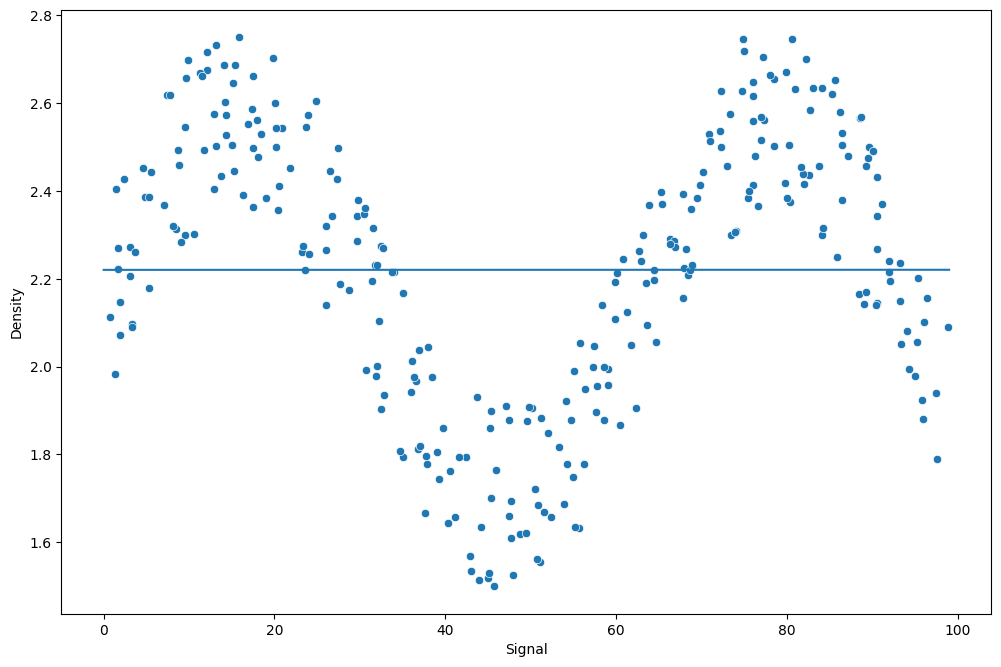

In [36]:
plt.figure(figsize=(12, 8), dpi = 100)
sns.scatterplot(x = 'Signal', y='Density', data=df)
plt.plot(signal_range, sign_pred)
plt.show()

In [42]:
y_test.std()

0.25703197024109625

In [43]:
lr_pred.std()

6.766345070259966e-05

In [46]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test, lr_pred)

-0.03426728142570212

In [79]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = MSE(y_test, pred) ** 0.5
    mae = MAE(y_test, pred)
    print(f'MAE: {mae}\nRMSE: {rmse}\n')
    
    
    sign_range = np.arange(0, 100)
    output = model.predict(sign_range.reshape(-1, 1))
    plt.figure(figsize=(12, 8), dpi = 100)
    sns.scatterplot(x = 'Signal', y='Density', data=df, color='black')
    plt.plot(sign_range, output)
    plt.show()

MAE: 0.211198973318633
 RMSE: 0.2570051996584629


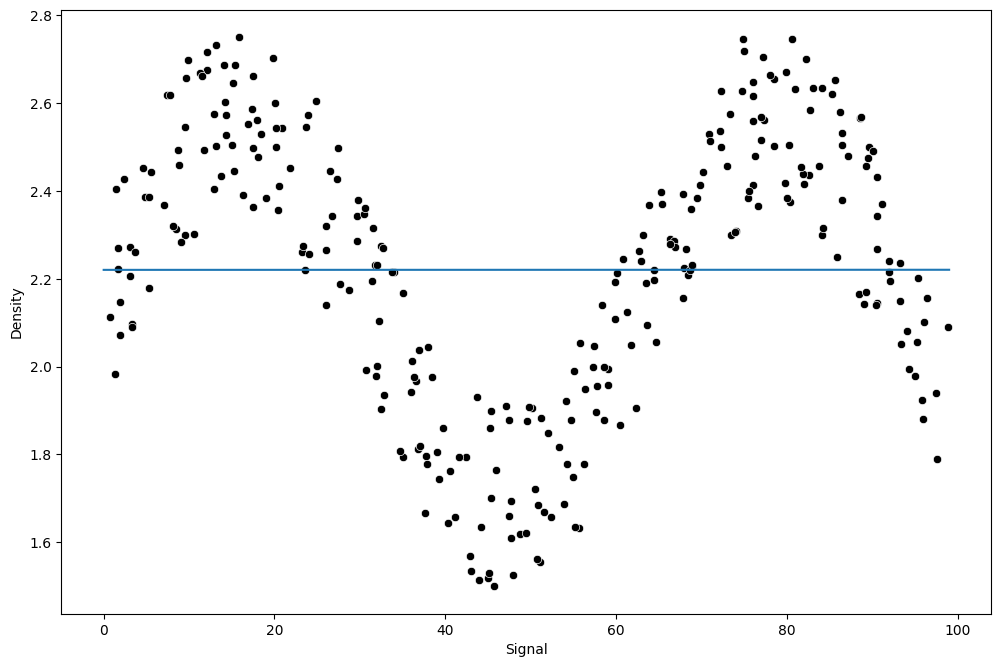

In [52]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [54]:
from sklearn.pipeline import make_pipeline

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE: 0.119691680455317
 RMSE: 0.1380752007754417


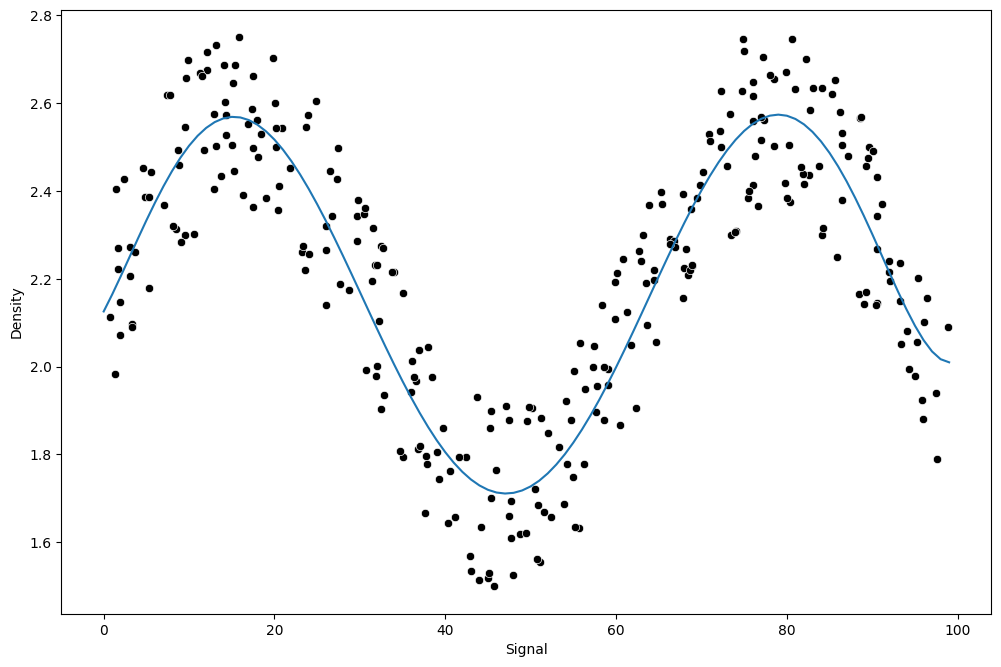

In [71]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
k_values = [1, 5, 10, 15, 20, 25, 30]

MAE: 0.11877297474442378
RMSE: 0.1523487028635337



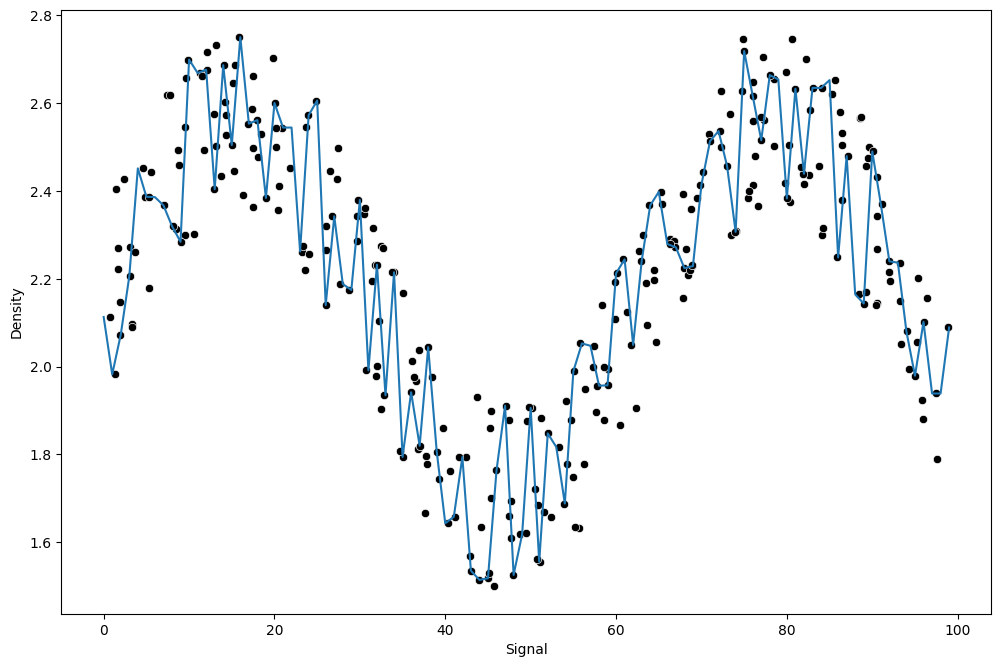


MAE: 0.12198383614100558
RMSE: 0.13730685016923647



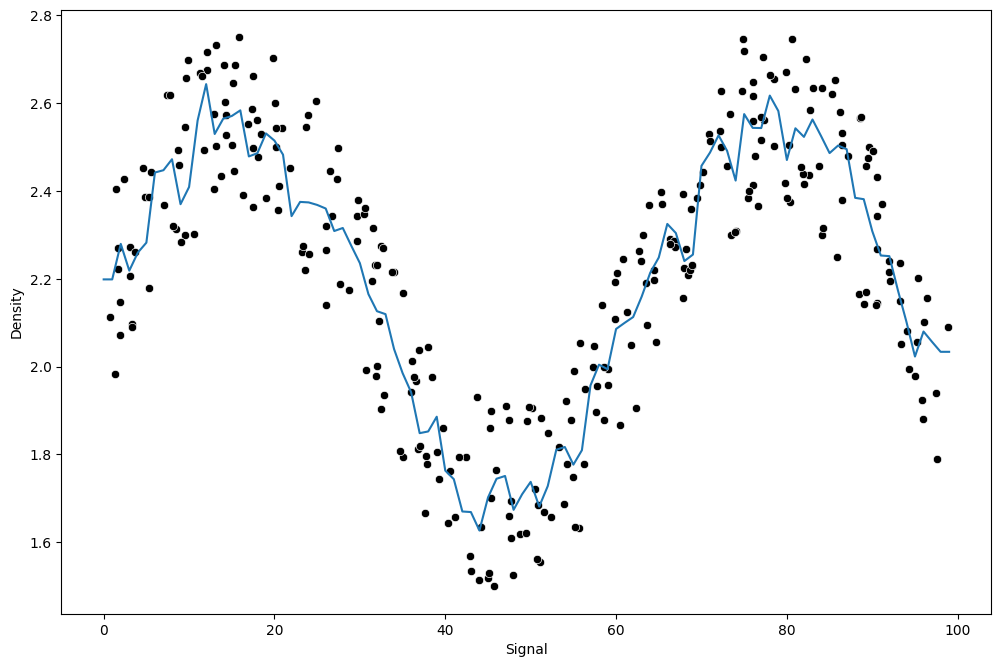


MAE: 0.11635971693292672
RMSE: 0.13277855732740926



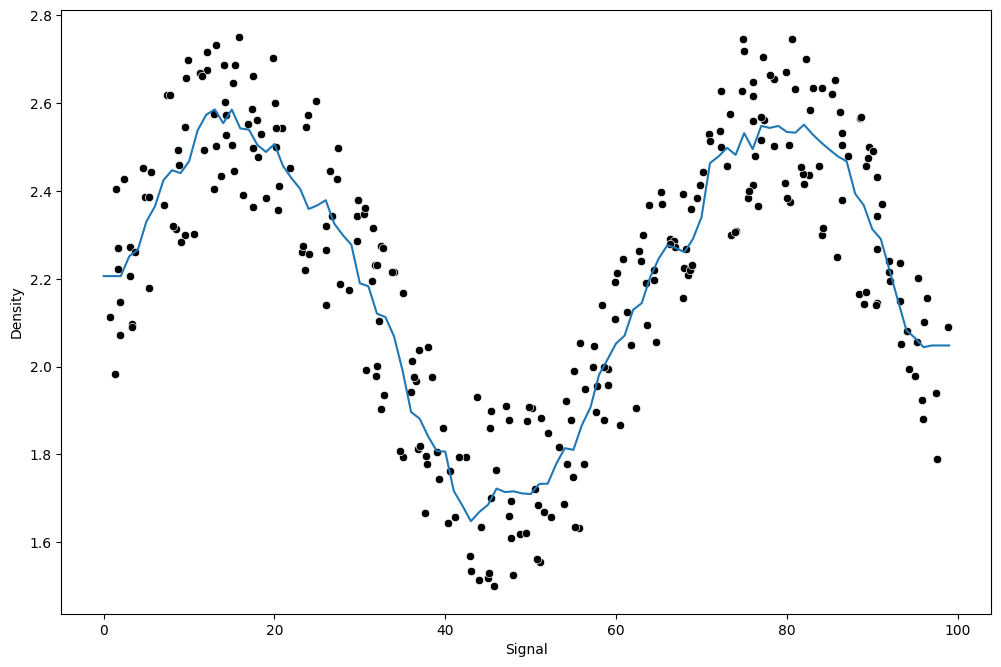


MAE: 0.11561598074223124
RMSE: 0.13351482702752904



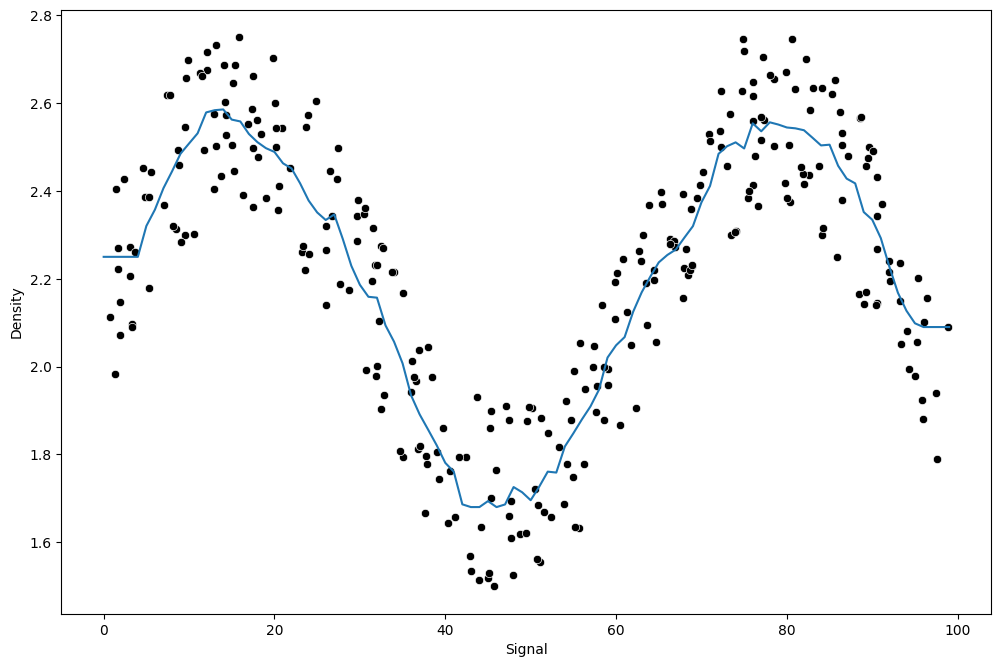


MAE: 0.1207030971917154
RMSE: 0.1397499127378895



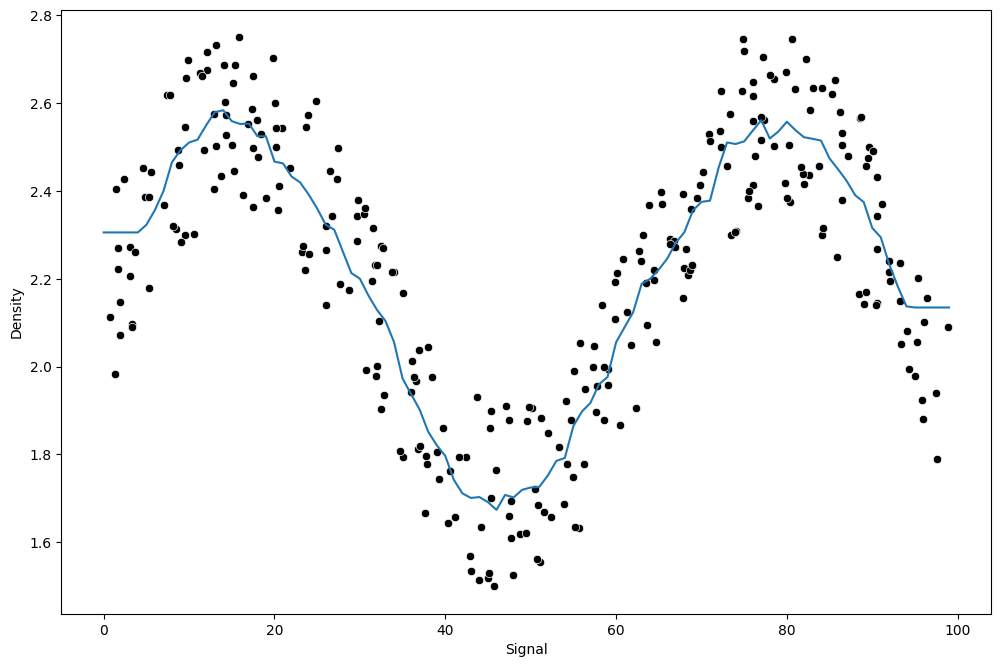


MAE: 0.12878322504026188
RMSE: 0.151321497164368



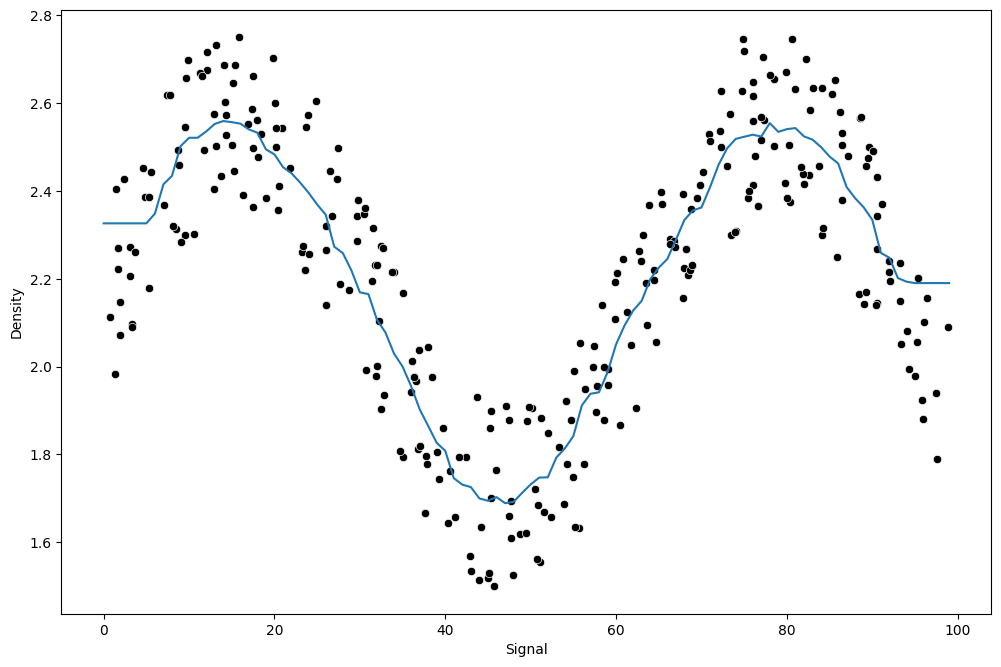


MAE: 0.13363165935705318
RMSE: 0.15954234753677107



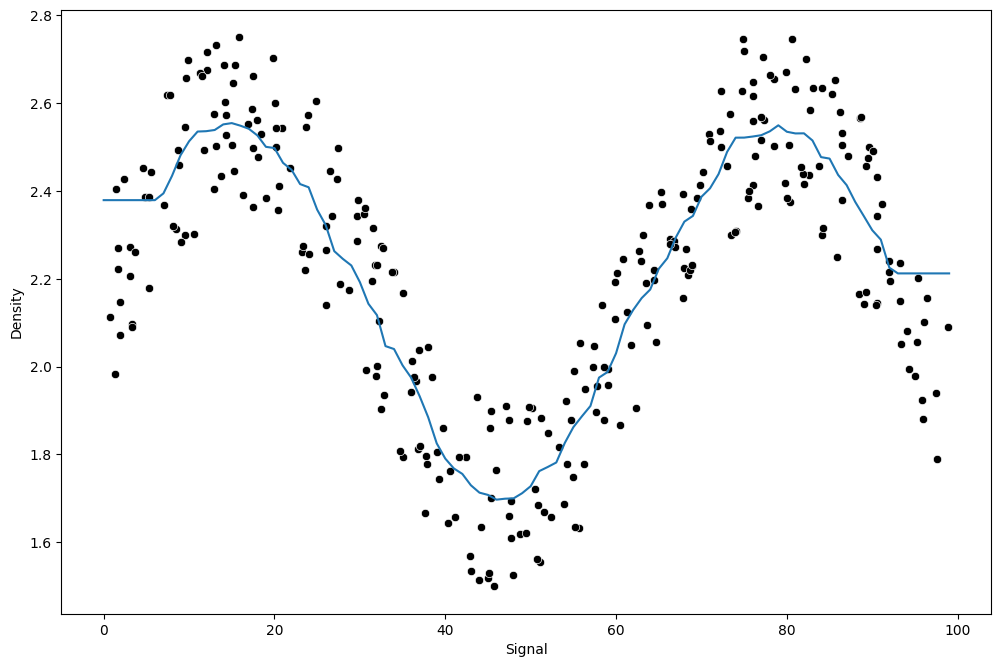

In [85]:
for i in k_values:
    model = KNeighborsRegressor(n_neighbors=i)
    run_model(model, X_train, y_train, X_test, y_test)
    print()

In [88]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

MAE: 0.11877297474442378
RMSE: 0.1523487028635337



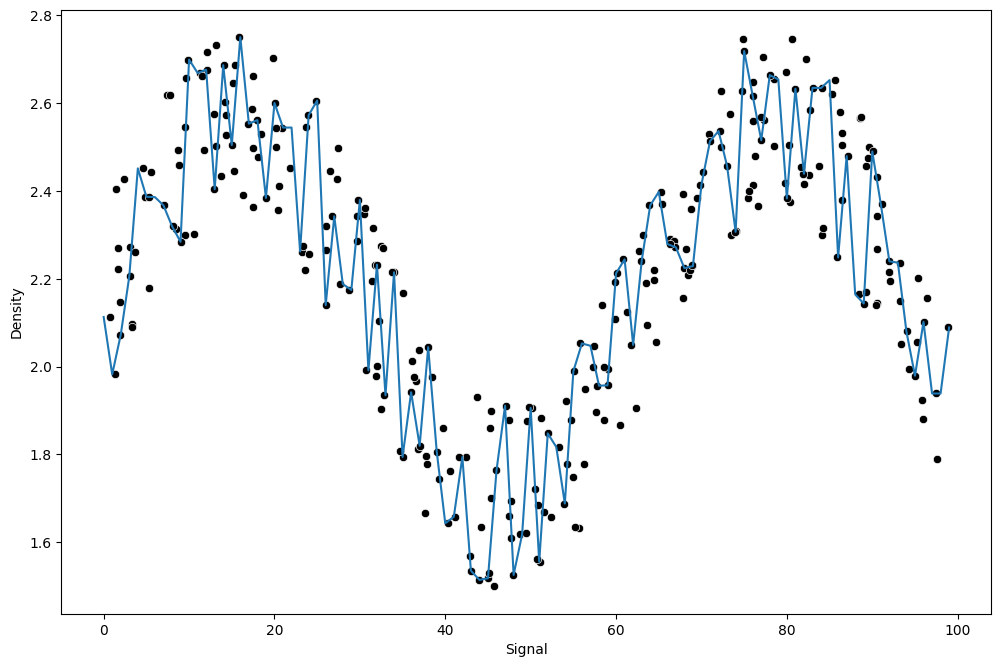

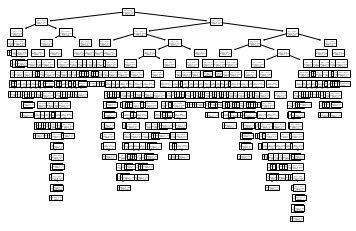

In [91]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)
plot_tree(model);    

In [92]:
from sklearn.svm import SVR

In [93]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['auto', 'scale']
}
grid = GridSearchCV(SVR(), param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696



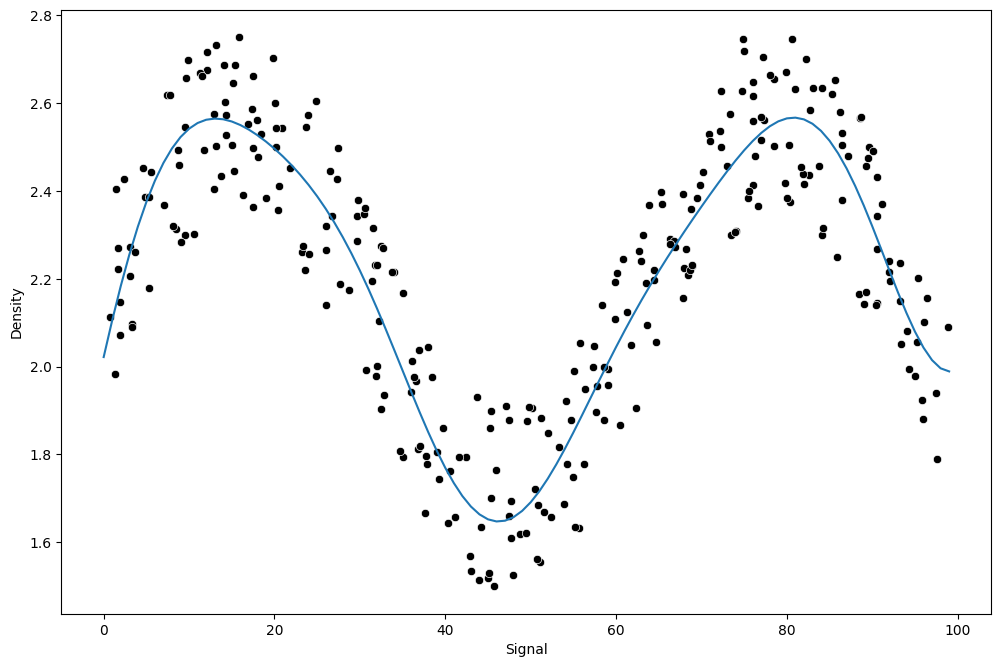

In [98]:
run_model(grid, X_train, y_train, X_test, y_test)

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rfc_ = RandomForestRegressor(n_estimators = 5)


MAE: 0.11538396004618202
RMSE: 0.14447372700142722



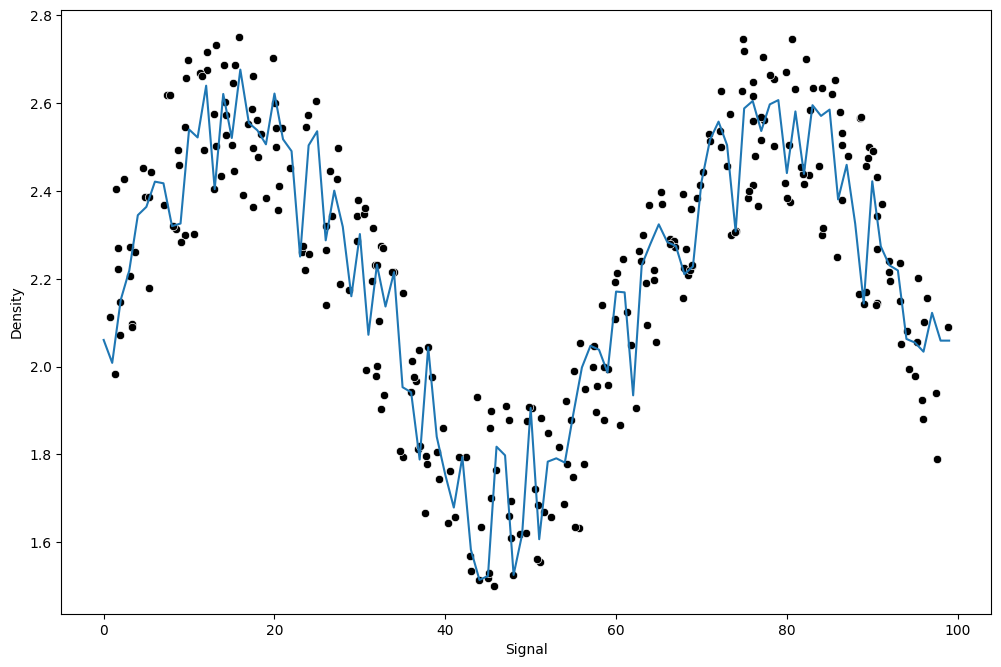

In [109]:
run_model(rfc_, X_train, y_train, X_test, y_test)

In [105]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667



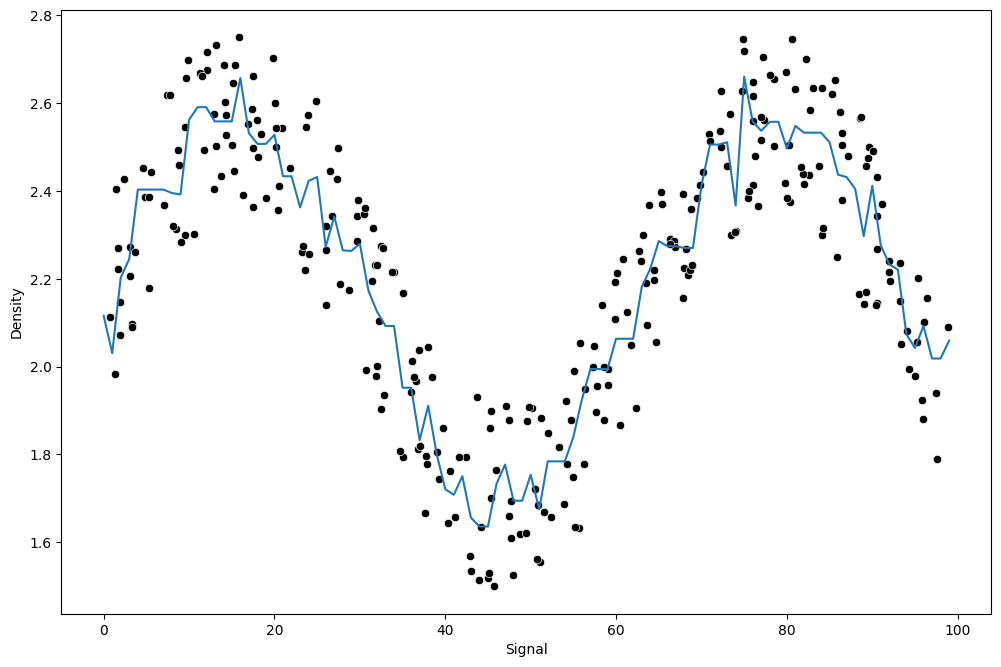

In [106]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11251595014449596
RMSE: 0.1282701621899314



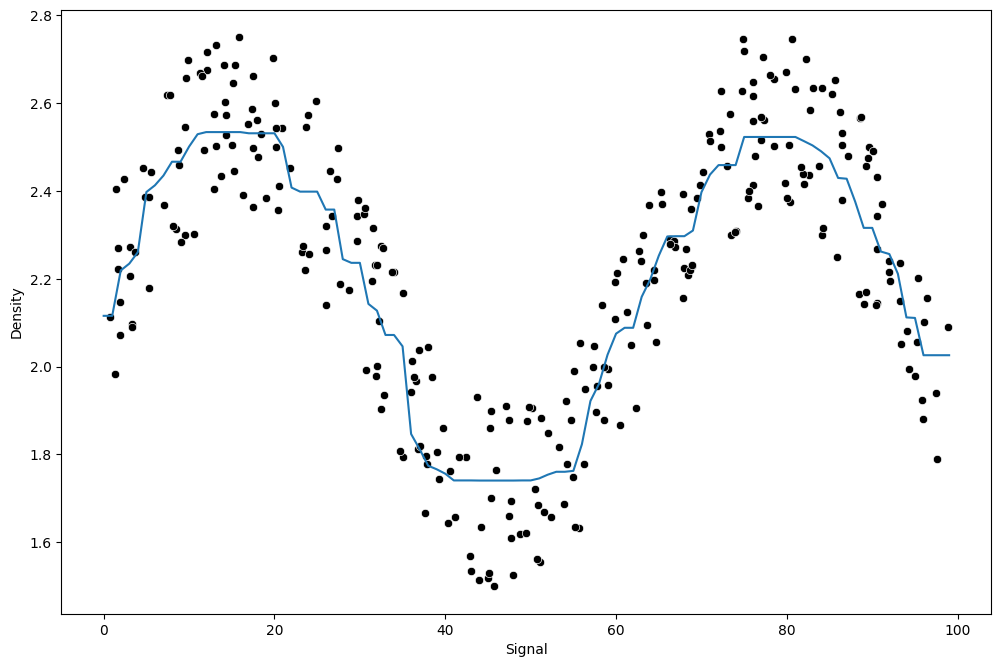

In [107]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)